# FeedForward Neural Network

\begin{align*}
\text{Input Layer} \quad (l &= 1): \\
a^{(1)} &= x \\
\\
\text{Hidden Layers} \quad (l &= 2, 3, \ldots, L-1): \\
z^{(l)} &= W^{(l)} a^{(l-1)} + b^{(l)} \\
a^{(l)} &= f^{(l)}(z^{(l)}) \\
\\
\text{Output Layer} \quad (l &= L): \\
z^{(L)} &= W^{(L)} a^{(L-1)} + b^{(L)} \\
\hat{y} &= a^{(L)} = f^{(L)}(z^{(L)})
\end{align*}


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the architecture of the one-layer feedforward neural network
class OneLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(OneLayerNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)  # Fully connected layer

    def forward(self, x):
        x = self.fc(x)
        return x

# Example usage
if __name__ == "__main__":
    # Define input and output sizes
    input_size = 10
    output_size = 20

    # Create an instance of the one-layer feedforward neural network
    model = OneLayerNN(input_size, output_size)

    # Define some input data (batch size of 1 for simplicity)
    input_data = torch.randn(1, input_size)

    # Perform forward pass
    output = model(input_data)

    print("Output:", output)


Output: tensor([[ 0.4594,  0.2626,  0.0250,  0.3324,  0.1247, -0.0387,  0.0589,  0.6150,
          0.1814,  0.2420,  0.0439, -0.1569, -0.5358,  0.4796,  0.8291,  0.1185,
          0.4857,  0.4156,  0.1636, -1.2368]], grad_fn=<AddmmBackward0>)


In [2]:
total_params = sum(p.numel() for p in model.parameters())
print("Total number of parameters:", total_params)


Total number of parameters: 220


In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28 = 784, flattened input image
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# One-layer neural network model
class OneLayerNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(OneLayerNN, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input image
        out = self.fc(x)
        return out

# Initialize the model
model = OneLayerNN(input_size, num_classes).to(device)



100%|██████████| 9912422/9912422 [00:00<00:00, 307446710.72it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 14799718.24it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 138695078.55it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14802275.66it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



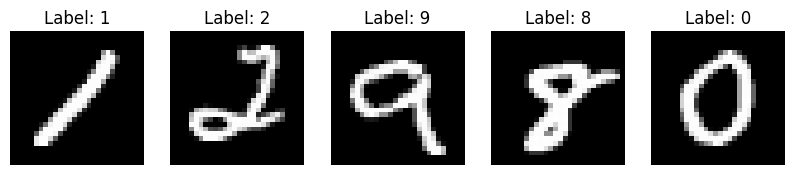

In [5]:
import matplotlib.pyplot as plt
import numpy as np

num_samples = 5
random_indices = np.random.randint(len(train_dataset), size=num_samples)

# Plot the samples
fig, axes = plt.subplots(1, num_samples, figsize=(10, 2))

for i, idx in enumerate(random_indices):
    image, label = train_dataset[idx]
    axes[i].imshow(image.squeeze().numpy(), cmap='gray')
    axes[i].set_title('Label: {}'.format(label))
    axes[i].axis('off')

plt.show()


In [6]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))



Epoch [1/5], Step [100/600], Loss: 0.8371
Epoch [1/5], Step [200/600], Loss: 0.5290
Epoch [1/5], Step [300/600], Loss: 0.4045
Epoch [1/5], Step [400/600], Loss: 0.4514
Epoch [1/5], Step [500/600], Loss: 0.3495
Epoch [1/5], Step [600/600], Loss: 0.3676
Epoch [2/5], Step [100/600], Loss: 0.3005
Epoch [2/5], Step [200/600], Loss: 0.3931
Epoch [2/5], Step [300/600], Loss: 0.3801
Epoch [2/5], Step [400/600], Loss: 0.4323
Epoch [2/5], Step [500/600], Loss: 0.3945
Epoch [2/5], Step [600/600], Loss: 0.2730
Epoch [3/5], Step [100/600], Loss: 0.3263
Epoch [3/5], Step [200/600], Loss: 0.2318
Epoch [3/5], Step [300/600], Loss: 0.3532
Epoch [3/5], Step [400/600], Loss: 0.2233
Epoch [3/5], Step [500/600], Loss: 0.2533
Epoch [3/5], Step [600/600], Loss: 0.3785
Epoch [4/5], Step [100/600], Loss: 0.3025
Epoch [4/5], Step [200/600], Loss: 0.2187
Epoch [4/5], Step [300/600], Loss: 0.3271
Epoch [4/5], Step [400/600], Loss: 0.2596
Epoch [4/5], Step [500/600], Loss: 0.2212
Epoch [4/5], Step [600/600], Loss:

In [7]:
output

tensor([[ 0.4594,  0.2626,  0.0250,  0.3324,  0.1247, -0.0387,  0.0589,  0.6150,
          0.1814,  0.2420,  0.0439, -0.1569, -0.5358,  0.4796,  0.8291,  0.1185,
          0.4857,  0.4156,  0.1636, -1.2368]], grad_fn=<AddmmBackward0>)

In [8]:
# Test the model
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))


Accuracy of the network on the 10000 test images: 92.35 %


In [9]:
outputs.data

tensor([[-4.1420e+00, -1.0726e+00,  2.0343e-01, -2.2424e-01, -2.9357e+00,
          4.8445e-01, -2.9541e+00, -7.5672e+00,  3.7115e+00, -3.4504e+00],
        [-4.4399e+00, -9.4450e+00, -4.2426e+00, -2.4435e+00,  3.9758e+00,
          3.5740e-01, -4.3308e+00, -2.6024e+00,  1.7499e+00,  3.2436e+00],
        [ 4.6233e+00, -1.1204e+01, -3.2722e+00, -5.0656e+00, -5.6929e+00,
          1.5012e+00, -6.4350e+00, -3.4285e+00, -5.5311e+00, -4.8089e+00],
        [-7.5313e+00,  4.6000e+00,  9.1538e-01, -8.3588e-01, -1.2953e+00,
         -4.0069e+00, -4.5873e+00, -2.1507e+00,  1.6598e+00, -2.8698e+00],
        [-6.9642e-01, -7.7546e+00,  1.0916e+00, -1.8605e+00, -2.8230e+00,
         -1.7123e+00, -4.7528e+00, -4.2227e+00, -3.1343e+00, -4.8657e+00],
        [-3.8351e+00, -5.8601e+00, -4.1559e-01, -5.9654e-01, -3.3273e+00,
         -7.2883e+00, -5.5535e+00,  2.1983e+00,  1.4121e+00,  3.4437e+00],
        [-2.1848e+00, -4.7032e+00, -5.7563e-01, -6.0751e+00,  4.3164e+00,
         -3.1447e+00,  2.0914e+0